In [2]:
from fastai import *
from fastai.collab import *

### Collaborative filtering example

In [15]:
torch.cuda.set_device(1)

In [16]:
path = untar_data(URLs.ML_SAMPLE)
path.ls()

[PosixPath('/home/deep/.fastai/data/movie_lens_sample/ratings.csv')]

In [17]:
ratings=pd.read_csv(path/'ratings.csv')
series2cat(ratings,'userId','movieId')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


That's all the data tha we need!

In [18]:
data = CollabDataBunch.from_df(ratings, seed=42)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


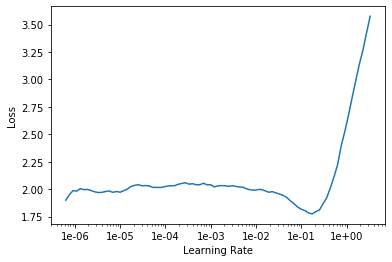

In [19]:
learn = collab_learner(data,n_factors=50,y_range=[0.0,5.5])
lr_find(learn)
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(3, 5e-3)

epoch,train_loss,valid_loss,time
0,1.621052,0.962855,00:01
1,0.859190,0.682727,00:01
2,0.655066,0.673139,00:01


In [21]:
?collab_learner

Signature:
collab_learner(
    data,
    n_factors:int=None,
    use_nn:bool=False,
    emb_szs:Dict[str, int]=None,
    layers:Collection[int]=None,
    ps:Collection[float]=None,
    emb_drop:float=0.0,
    y_range:Union[Tuple[float, float], NoneType]=None,
    use_bn:bool=True,
    bn_final:bool=False,
    **learn_kwargs,
) -> fastai.basic_train.Learner
Docstring: Create a Learner for collaborative filtering on `data`.
File:      ~/.local/lib/python3.6/site-packages/fastai/collab.py
Type:      function


In [22]:
doc(collab_learner)

collab_learner [source] [test] collab_learner ( data , n_factors : int = None , use_nn : bool = False , emb_szs : Dict [ str , int ]= None , layers : Collection [ int ]= None , ps : Collection [ float ]= None , emb_drop : float = 0.0 , y_range : OptRange = None , use_bn : bool = True , bn_final : bool = False , ** learn_kwargs ) → Learner 
 
 × No tests found for collab_learner . To contribute a test please refer to this guide and this discussion . Create a Learner for collaborative filtering on data . 
 Show in docs

### Movielens 100k

In [26]:
path=Config.data_path()/'ml-100k'
path.ls()

FileNotFoundError: [Errno 2] No such file or directory: '/home/deep/.fastai/data/ml-100k'

In [25]:
ratings=pd.read_csv(path/'u.data',delimiter='\t',header=None,names=[user,item,'rating','timestamp'])

NameError: name 'userId' is not defined